In [1]:
# Importing the libraries
from __future__ import print_function
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import sklearn as sl
import pandas as pd
import cv2
import os
import sys
import matplotlib.pyplot as plt

In [2]:
# Setting constants for the program
path = "/home/satvik/codes/Machine_Learning/Images/"
a = os.listdir(path)
N_REGIONS = 10

In [3]:
# Creating Dataset of 5 features from image.
def create_data(img):
    X = []
    lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            el = lab_image[i, j]
            X.append([el[0], el[1], el[2], i, j])
    return X


In [4]:
def plot_results(img, labels):
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1, colors=[plt.cm.spectral(l / float(N_REGIONS)), ])
    plt.imshow(img)
    plt.show()


In [5]:
X = []
images = []
for name in a:
    cur_path = path + name
    img = cv2.imread(cur_path)
    img = cv2.medianBlur(img, 5)
    img = cv2.resize(img, (100, 100))
    images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    X.append(create_data(img))

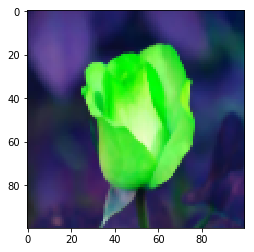

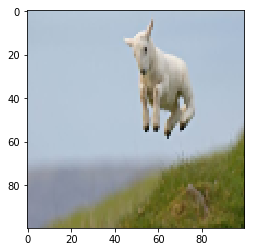

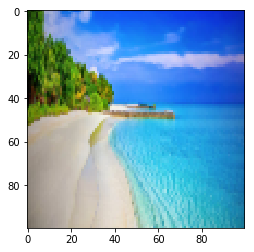

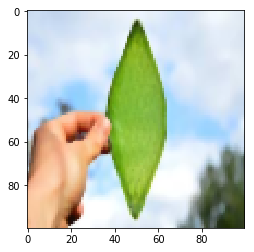

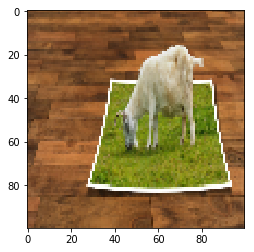

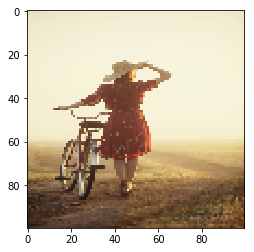

In [6]:
for img in images:
    plt.imshow(img)
    plt.show()

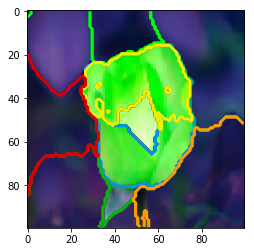

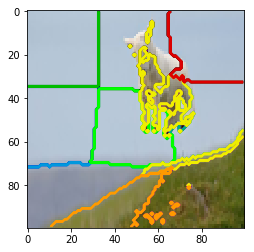

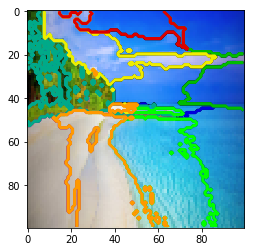

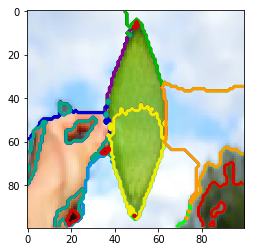

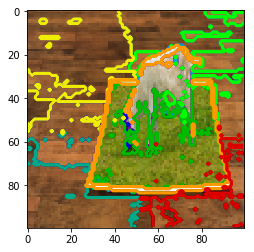

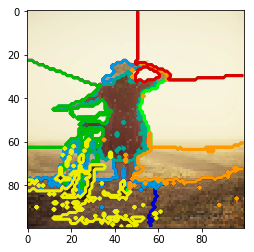

In [7]:
from sklearn.cluster import KMeans

for i in range(len(X)):  
    img = images[i]
    cl = KMeans(n_clusters=N_REGIONS, random_state=0).fit(X[i])
    y = cl.predict(X[i])
    labels = y.reshape(img.shape[0:2])
    plot_results(img, labels)

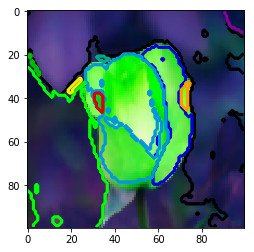

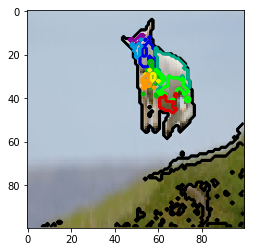

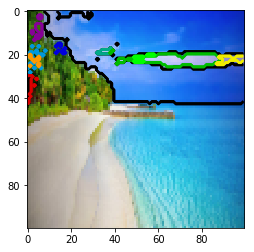

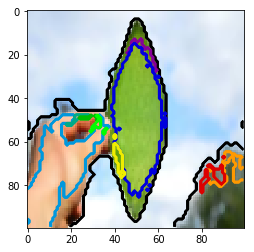

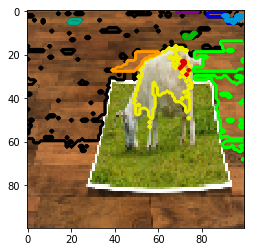

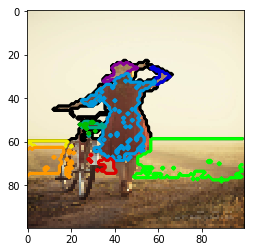

In [17]:
from sklearn.cluster import DBSCAN

for i in range(len(X)):  
    img = images[i]
    cl = DBSCAN(eps = 6, min_samples = 10).fit(X[i])
    y = cl.labels_
    labels = y.reshape(img.shape[0:2])
    plot_results(img, labels)

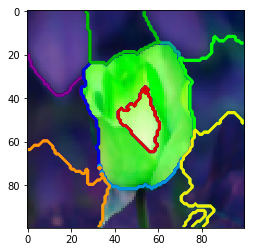

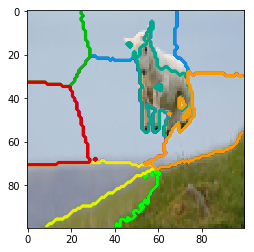

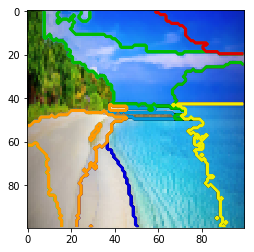

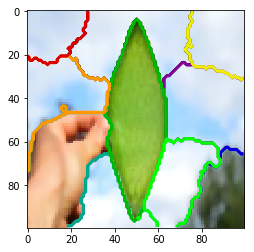

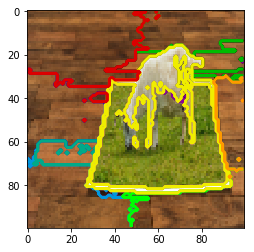

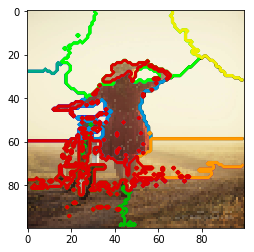

In [12]:
from sklearn.cluster import SpectralClustering

for i in range(len(X)):  
    img = images[i]
    cl = SpectralClustering(n_neighbors=10, affinity='nearest_neighbors', n_clusters = N_REGIONS).fit(X[i])
    y = cl.labels_
    labels = y.reshape(img.shape[0:2])
    plot_results(img, labels)

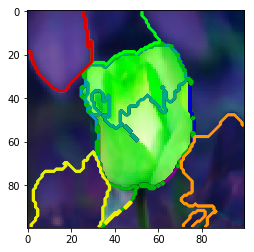

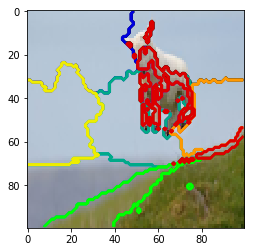

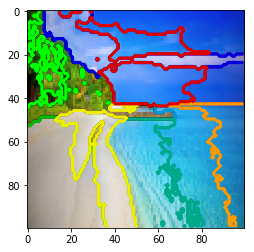

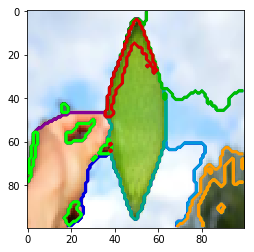

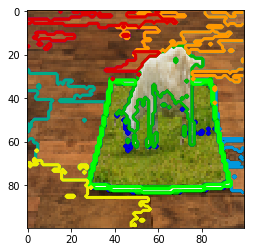

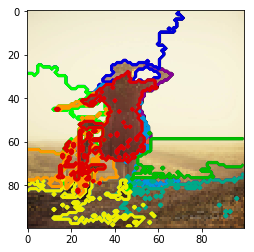

In [20]:
from sklearn.cluster import AgglomerativeClustering

for i in range(len(X)):  
    img = images[i]
    cl = AgglomerativeClustering(n_clusters=N_REGIONS).fit(X[i])
    y = cl.labels_
    labels = y.reshape(img.shape[0:2])
    plot_results(img, labels)